In [43]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading the data
df = pd.read_csv("Dataset .csv")

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## Task one

In [19]:
#Determine the top three most common cuisines & the percentage of restautants that serve the top cuisines

# value_counts gives a unique list of cuisines and the number of occurrences.
cuisines_count = df.Cuisines.value_counts()
cuisines_count

North Indian                                             936
North Indian, Chinese                                    511
Chinese                                                  354
Fast Food                                                354
North Indian, Mughlai                                    334
                                                        ... 
Bengali, Fast Food                                         1
North Indian, Rajasthani, Asian                            1
Chinese, Thai, Malaysian, Indonesian                       1
Bakery, Desserts, North Indian, Bengali, South Indian      1
Italian, World Cuisine                                     1
Name: Cuisines, Length: 1825, dtype: int64

In [21]:
# top three most common cuisines

top_three = cuisines_count.sort_values(ascending = False).iloc[:3]
top_three

North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: Cuisines, dtype: int64

In [27]:
# percentage of restaurants that serve each of the top cuisinses

total_restuarants = df["Restaurant ID"].count()
percentage = (top_three/total_restuarants) * 100
percentage

North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: Cuisines, dtype: float64

## Task two

In [33]:
# city with highest number of restaurants. 
# note: the number of times a city appears shows the no. of restaurants in that city

city_count = df["City"].value_counts()
top_city = city_count.idxmax()
print("The city with the highest number of restaurants is ", top_city)

The city with the highest number of restaurants is  New Delhi


In [39]:
# average rating for restaurants in each city

average_rating = df.groupby("City")["Aggregate rating"].mean()
average_rating

City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64

In [41]:
# city with the highest average rating

city_highest_avg_rating = average_rating.idxmax()
print(f"The city with the highest average rating is {city_highest_avg_rating}")

The city with the highest average rating is Inner City


## Task three

In [42]:
# percentage of restaurants in each price range

pricerange_count = df["Price range"].value_counts()
percentage_pricerange = (pricerange_count/total_restuarants) * 100
percentage_pricerange

1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: Price range, dtype: float64

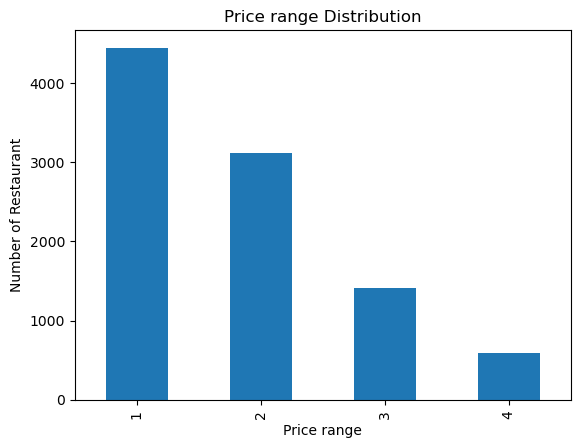

In [52]:
# distribution of price ranges among restaurants

pricerange_count.plot(kind = 'bar')
plt.xlabel('Price range')
plt.ylabel('Number of Restaurant')
plt.title('Price range Distribution')
plt.show()

## Task four

In [44]:
# percentage of restaurants that offer online delivery

online_delivery = df["Has Online delivery"].value_counts()
online_delivery_percentage = (online_delivery/total_restuarants) * 100
online_delivery_percentage

No     74.337766
Yes    25.662234
Name: Has Online delivery, dtype: float64

In [46]:
# comparison of average rating of restaurants with and without online delivery

average_rating_online_delivery = df.groupby("Has Online delivery")["Aggregate rating"].mean()
average_rating_online_delivery

Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64